![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Ensemble Project Module Part A
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


# DOMAIN: Telecom:
**CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.**

**• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata.** 
**The data set includes information about:**

**• Customers who left within the last month – the column is called Churn**

**• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies**

**• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges**

**• Demographic info about customers – gender, age range, and if they have partners and dependents**

**• PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the**

**company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.**

**• STEPS AND TASK:**

**1. Data Understanding & Exploration:**

**A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.**

**B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**

**C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

**D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.**

**2. Data Cleaning & Analysis:**

**A. Impute missing/unexpected values in the DataFrame.**

**B. Make sure all the variables with continuous values are of ‘Float’ type.**

**[For Example: MonthlyCharges, TotalCharges]**

**C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.**

**D. Share insights for Q2.c.** 
**E. Encode all the appropriate Categorical features with the best suitable approach.**
**F. Split the data into 80% train and 20% test.** 
**G. Normalize/Standardize the data with the best suitable approach.**
**3. Model building and Improvement** 
**A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.**
**B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.**

In [1]:
# Importing Libreries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.pipeline import Pipeline, make_pipeline
import warnings
import time
import scikitplot as skplt
from sklearn import metrics
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
#!pip install catboost
from catboost import CatBoostClassifier
#!pip install xgboost
from xgboost import XGBClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support,mean_absolute_error, accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Loading Data</div>

In [77]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Shape and Size of Dataset</div>

In [3]:
print(f"Shape of Dataset : {df1.shape}")
print(f"Size of Dataset : {df1.size}")
print(f"Shape of Dataset : {df2.shape}")
print(f"Size of Dataset : {df2.size}")

Shape of Dataset : (7043, 10)
Size of Dataset : 70430
Shape of Dataset : (7043, 12)
Size of Dataset : 84516


In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Merging Dataset</div>

In [6]:
df=df1.merge(df2, on='customerID')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Shape and Size of Final dataset</div>

In [7]:
print(f"Shape of final Dataset : {df.shape}")
print(f"Size of final Dataset : {df.size}")

Shape of final Dataset : (7043, 21)
Size of final Dataset : 147903


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Checking for Duplicate Values</div>

In [8]:
df[df.duplicated(keep = 'first')] #No Duplicates in the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Variable Description</div>
gender --> Whether the customer is a male or a female

SeniorCitizen --> Whether the customer is a senior citizen or not (1, 0)

Partner --> Whether the customer has a partner or not (Yes, No)

Dependents --> Whether the customer has dependents or not (Yes, No)

tenure --> Number of months the customer has stayed with the company

PhoneService --> Whether the customer has a phone service or not (Yes, No)

MultipleLines --> Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService --> Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity --> Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup --> Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection --> Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport --> Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV --> Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies --> Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract --> The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling --> Whether the customer has paperless billing or not (Yes, No)

PaymentMethod --> The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges --> The amount charged to the customer monthly

TotalCharges --> The total amount charged to the customer



## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Data Cleaning</div>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">5 point Summary</div>


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Treating Missing Values</div>

In [13]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df[i]=df[i].replace(" ",np.nan)

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df. isnull(). sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

**Observed 11 missing values in TotalCharges.**

**Impute missing values with Mean.**


**Need to convert TotalObjects into float, because the values are continuous.**

In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [17]:
df.mean()

SeniorCitizen        0.162147
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

In [18]:
df.fillna(df.mean(),inplace = True)

**Filled NaN values with mean of particular attribute, here the case is TotalCharges.**

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Convert to categorical data</div>


In [21]:
print('The data type of each attribute after conversion into categorical variables: \n')
for cols in df.columns: # Loop through all columns in the dataframe
    if df[cols].dtype == 'object':
        df[cols] = pd.Categorical(df[cols])
df.dtypes

The data type of each attribute after conversion into categorical variables: 



customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [22]:
df.drop(['customerID'], axis=1) # dropping customer id since it has no use

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
df['customerID'] = df['customerID'].astype('object')

In [24]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

In [25]:
# Categorical Features with extra 'No internet service' group will be replace with just 'No'

df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Pie Chart for All categorical data and InSights</div>


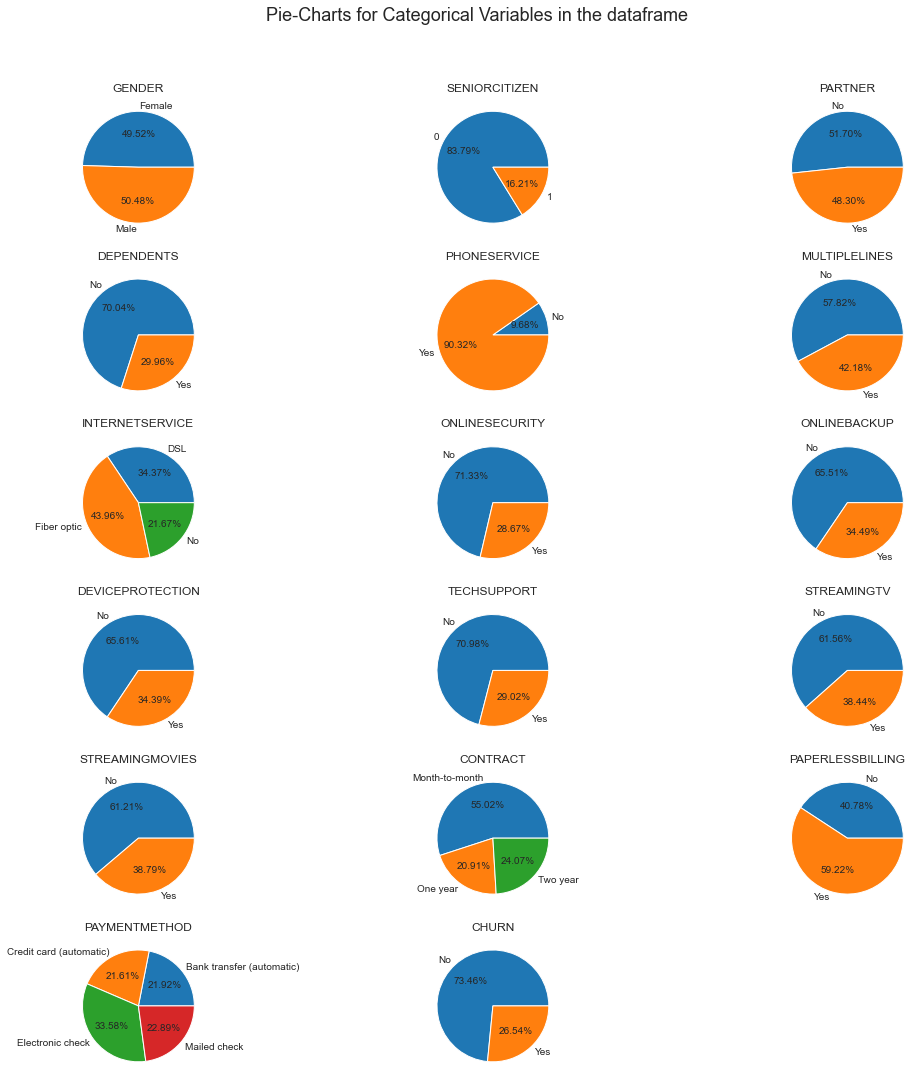

In [69]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df_pie,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(18, 18))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()
#calling the function to plot pie-charts for categorical variable

pie_charts_for_CategoricalVar(df,3)   #dataframe, no. of cols in the grid

>> **as seen i above pie chart male female rationb is almost same**

>> **Seniors citizens are less compared to youger generation**

>> **Patner non partner ratio is almost equal**

>> **43.96% people uses fiber optic and 34.37% uses dls and 21.61% user are not usind internet service**

>> **Majority of peole uses Phone service that is almost 91%**

>> **70% people are not dependet on other**

>> **71% people dont use online security**

>> **65% people dont use backup**

>> **only 34% people use device protection**

>> **71% people dont do for Techsupport**

>> **61% of people dont have online streaming facility for both movies and tv**

>> **Month to Month contract is more compared to one year and two years**

>> **60% people go for paperless billing**

>> **payment methods are spreead among 4 categories mostly used is electronic check**

>> **73% people did not churn and 27% people did left the telecom service**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">pair Plot Insights</div>


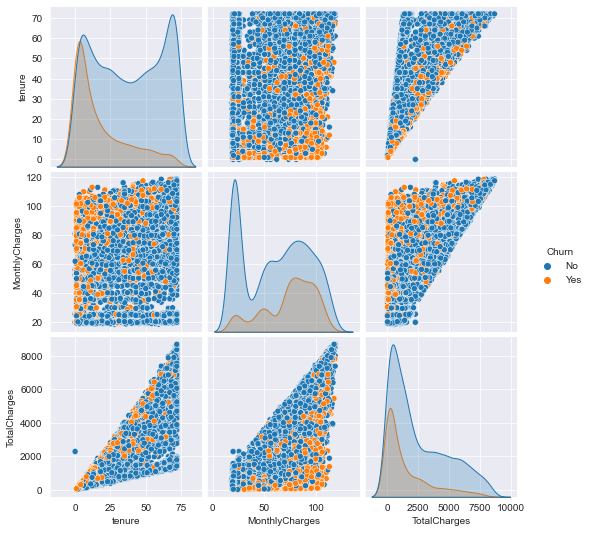

In [27]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

>> **There is some +ve relation between tennure and total charges and monthly charges and total charges**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Encoding all the appropriate Categorical features with the best suitable approach</div>


In [28]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [29]:
# converting the categorical features
df_dummies = pd.get_dummies(df[categorical_variables])

# adding the numerical features
df_dummies[['tenure', 'MonthlyCharges', 'TotalCharges']] = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

df_dummies['Churn'] = df['Churn']
df_dummies['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df_dummies.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,29.85,29.85,0
1,0,1,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,34,56.95,1889.50,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,2,53.85,108.15,1
3,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,0,0,45,42.30,1840.75,0
4,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,2,70.70,151.65,1


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Target Predictor</div>


In [30]:
count_no_churn = (df_dummies['Churn'] == 0).sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (df_dummies['Churn']==1).sum()
print("Number of customers who churnes:",count_yes_churn)

Number of customers who didn't churn: 5174
Number of customers who churnes: 1869


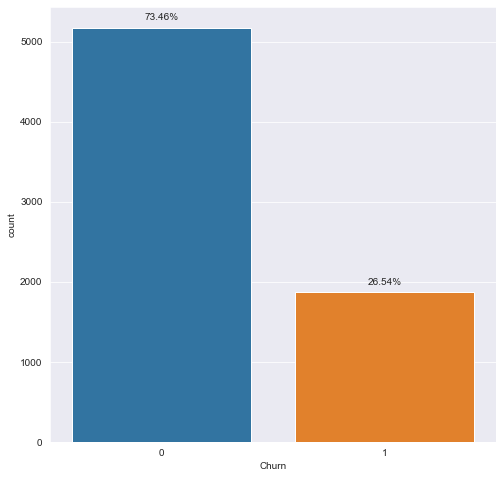

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(df_dummies['Churn'].unique())+6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = df_dummies, x= 'Churn') 



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(df)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

**Imbalance in dataset:**

As we could see, our Target variable is not equally distributed, only 26.54% of customers have Churned. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , customers who are not churned out) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result.

**Balancing the Target Variable**

So I am going to balance the target variable with SMOTE (Synthetic Minority Oversampling Technique). With our training data created, I’ll up-sample minority sample( in our case the 'yes_churn' (customers who churn) sample using the SMOTE algorithm. At a high level, SMOTE:

1.Works by creating synthetic samples from the minor class ( yes-churn) instead of creating copies.

2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Segregate predictors vs target attributes</div>


In [32]:
X = df_dummies.drop(['Churn'], axis=1)
y = df_dummies['Churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7043, 39)
Shape of y: (7043,)


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Standardization (Scaling) for numerical variables</div>


In [33]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ["MonthlyCharges","TotalCharges","tenure"]
scaler=StandardScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.sample(5)

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4988,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,-0.259435,-1.514286,-0.805223
4885,0,1,0,1,0,1,1,0,0,1,...,1,0,1,1,0,0,0,1.613701,1.558377,2.534197
3082,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0.758574,-0.161583,0.335697
772,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,-1.277445,-1.491021,-0.999365
1394,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,1.206498,1.530126,2.012350


## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Train and Test Split</div>

In [34]:
df_dummies['Churn'] = df_dummies['Churn'].astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 39)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 39)
Number transactions y_test dataset:  (1409,)


In [37]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))


After OverSampling, the shape of train_X: (8216, 39)
After OverSampling, the shape of train_y: (8216,)


Now we have a perfect balanced data!I only **over-sampled on the training data**, because by oversampling only on the training data, **none of the information in the test data is being used to create synthetic observations**, therefore, no information will bleed from test data into the model training.

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Model using XGBoost.printing best performing parameters along with train and test performance</div>

Accuracy Score of Training Data:  0.9389421370252041

Accuracy Score of Test Data: 0.794889992902768

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.85      0.89      0.87      1066
           1       0.59      0.51      0.55       343

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.79      0.79      0.79      1409


Mean Absolute Error of Gradient Boosting Classification Model:
 0.20511000709723207

Confusion Matrix of Gradient Boosting Classification Model:
 [[945 121]
 [168 175]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of XGBoost Classification Model')

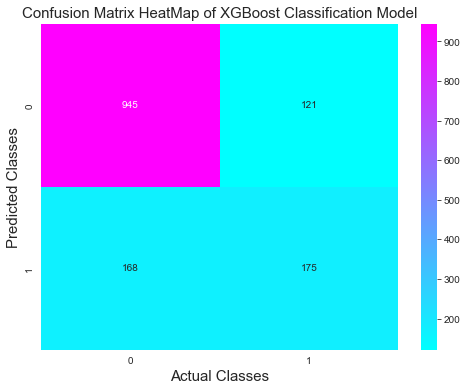

In [38]:
XGB = XGBClassifier()
XGB = XGB.fit(X_train, y_train)
y_predictXGB = XGB.predict(X_test)

modeltrXGB_score = XGB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)


# evaluate accuracy
modelXGB_score = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'cool', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)

In [39]:
precision_XGB, recall_XGB, f1_score_XGB, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_XGB)
print('Recall Score :', '%0.2f' % recall_XGB)
print('F1-Score :', '%0.2f' % f1_score_XGB)
print('Accuracy Score :','%0.2f' % modelXGB_score)

Precision Score : 0.72
Recall Score : 0.70
F1-Score : 0.71
Accuracy Score : 0.79


>> **training accuracy is 93% and test accuracy is 79% due overfitting of train data**
>> **over all recall score is 70% which means we are predicting 70% right**
>> **lets now fine tune this base model to increase accuracy and reaccll**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Feature Importance</div>

                                         Feature Importance
StreamingMovies_Yes                                0.000000
DeviceProtection_Yes                               0.000000
TechSupport_Yes                                    0.000000
MultipleLines_Yes                                  0.000000
StreamingTV_Yes                                    0.000000
PhoneService_Yes                                   0.000000
OnlineBackup_Yes                                   0.000000
OnlineSecurity_Yes                                 0.000000
PaperlessBilling_Yes                               0.000000
Partner_Yes                                        0.000000
SeniorCitizen_1                                    0.000000
gender_Male                                        0.000000
Dependents_Yes                                     0.000000
Partner_No                                         0.007210
PaymentMethod_Mailed check                         0.007789
gender_Female                           

Text(0.5, 1.0, 'Determining Feature Improtance with XGBoost Classifier')

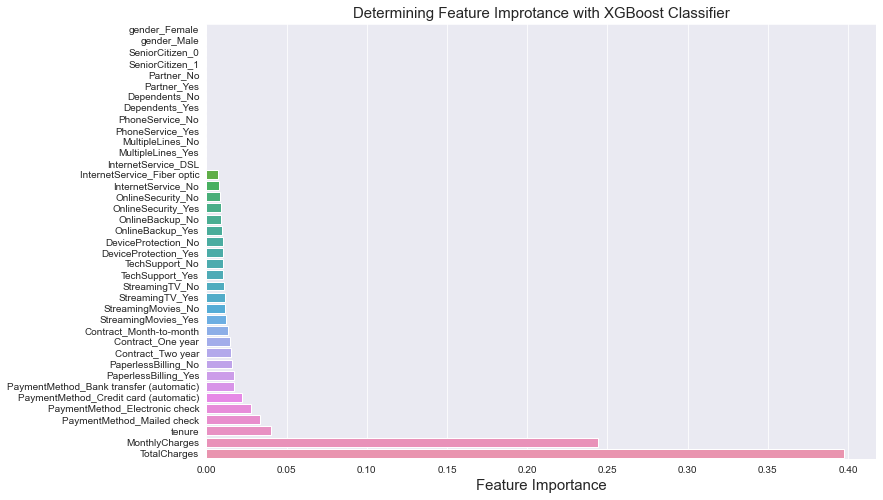

In [40]:
FI_XGB = pd.DataFrame(XGB.feature_importances_, columns = ['Feature Importance'], index = X_train.columns)
FI_xgb = FI_XGB.sort_values(by = 'Feature Importance', ascending = True)
print(FI_xgb)

plt.figure(figsize = (12, 8))
sns.barplot(x = FI_xgb['Feature Importance'], y = X_train.columns)
plt.xlabel('Feature Importance', fontsize = 15)
plt.title('Determining Feature Improtance with XGBoost Classifier', fontsize = 15)

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Fine tuning using Random search</div>

In [43]:
XGB = XGBClassifier(random_state=10)
skfold = StratifiedKFold(n_splits=5)
hyperparameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100]
    }
random_XGB = RandomizedSearchCV(XGB, hyperparameter_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
random_XGB.fit(X_train_res,y_train_res)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impor...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=10, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 10, 100],
                                        'n_estimators': [100, 400, 800]},
                   scoring='accuracy', verbose=1)

In [44]:
random_XGB.best_params_

{'n_estimators': 400,
 'min_child_weight': 10,
 'max_depth': 3,
 'learning_rate': 0.1}

Accuracy Score of Training Data:  0.8400780972665957

Accuracy Score of Test Data: 0.8062455642299503

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.86      0.89      0.87      1066
           1       0.62      0.53      0.57       343

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409


Mean Absolute Error of Gradient Boosting Classification Model:
 0.1937544357700497

Confusion Matrix of Gradient Boosting Classification Model:
 [[954 112]
 [161 182]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of XGBoost Classification Model')

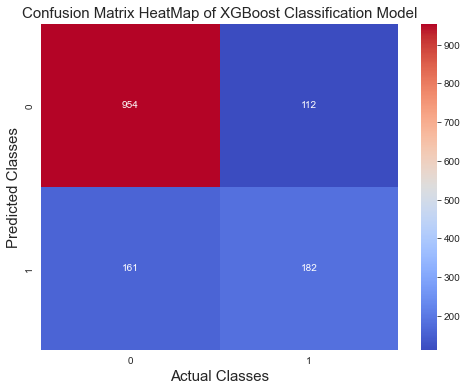

In [46]:
XGB = XGBClassifier(n_estimators= 400,min_child_weight = 10, max_depth = 3,learning_rate = 0.1)
XGB = XGB.fit(X_train, y_train)
y_predictXGB = XGB.predict(X_test)

modeltrXGB_score = XGB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)


# evaluate accuracy
modelXGB_score = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)

In [47]:
recision_XGB, recall_XGB, f1_score_XGB, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_XGB)
print('Recall Score :', '%0.2f' % recall_XGB)
print('F1-Score :', '%0.2f' % f1_score_XGB)
print('Accuracy Score :','%0.2f' % modelXGB_score)

Precision Score : 0.72
Recall Score : 0.71
F1-Score : 0.72
Accuracy Score : 0.81


>> **After fine tune using random search we reduced accuracy on training data to 84% slightly increased acccuracy on test data to 81%**

>> **we also increased recall score to 71%**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Fine tuning using Grid search</div>

In [54]:
XGB = XGBClassifier(random_state=10)
skfold = StratifiedKFold(n_splits=5)
param_grid = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
              'min_child_weight': [1, 10,50,100] 
              }
XGB = GridSearchCV(XGB, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
XGB.fit(X_train_res,y_train_res)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=10, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.05, 0.5, 1.5],
                         'max_depth': [2, 4, 6, 8],
                         'min_child_weight': [1, 10, 50, 100],
                         'n_estimators': [25, 50, 75, 100, 200]},
             scoring='accuracy', verbose=1)

In [55]:
XGB.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 200}

Accuracy Score of Training Data:  0.9270500532481363

Accuracy Score of Test Data: 0.8069552874378992

Classification Report of Gradient Boosting Classification Model:
                precision    recall  f1-score   support

           0       0.86      0.89      0.88      1066
           1       0.62      0.54      0.58       343

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Mean Absolute Error of Gradient Boosting Classification Model:
 0.1930447125621008

Confusion Matrix of Gradient Boosting Classification Model:
 [[952 114]
 [158 185]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of XGBoost Classification Model')

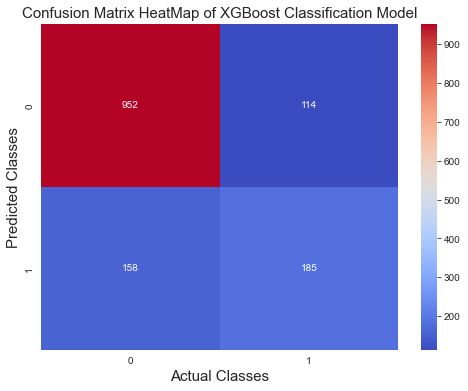

In [56]:
XGB = XGBClassifier(n_estimators= 200,min_child_weight = 1, max_depth = 8,learning_rate = 0.05)
XGB = XGB.fit(X_train, y_train)
y_predictXGB = XGB.predict(X_test)

modeltrXGB_score = XGB.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrXGB_score)


cfm_XGB = confusion_matrix(y_test, y_predictXGB)


# evaluate accuracy
modelXGB_score = accuracy_score(y_test, y_predictXGB)
print('\nAccuracy Score of Test Data:', modelXGB_score)
print('\nClassification Report of Gradient Boosting Classification Model:\n ', classification_report(y_test, y_predictXGB))
print('\nMean Absolute Error of Gradient Boosting Classification Model:\n', mean_absolute_error(y_test, y_predictXGB))
print('\nConfusion Matrix of Gradient Boosting Classification Model:\n', cfm_XGB)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_XGB, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of XGBoost Classification Model', fontsize = 15)

In [57]:
recision_XGB, recall_XGB, f1_score_XGB, support = precision_recall_fscore_support(y_test, y_predictXGB, average = 'macro')
print('Precision Score :', '%0.2f' % precision_XGB)
print('Recall Score :', '%0.2f' % recall_XGB)
print('F1-Score :', '%0.2f' % f1_score_XGB)
print('Accuracy Score :','%0.2f' % modelXGB_score)

Precision Score : 0.72
Recall Score : 0.72
F1-Score : 0.73
Accuracy Score : 0.81


>> **after grid search accuracy is 81%**

>> **But we increased recall score to 72%**

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Tuning n_estimators and Learning rate</div>

In [70]:
p_test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =XGBClassifier(max_depth=4,subsample=1,random_state=10), 
            param_grid = p_test1, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.best_params_, tuning.best_score_

[12:30:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



({'learning_rate': 0.05, 'n_estimators': 250}, 0.83898519561718)

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Tuning max_depth</div>

In [72]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =XGBClassifier(learning_rate=0.15,n_estimators=500 , subsample=1, random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train_res,y_train_res)
tuning.best_params_, tuning.best_score_

({'max_depth': 6}, 0.8357034118052995)

# Observation :**

After fine tuning different hyperparameters,

1) Able to improve the test accuracy.

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;">So Gridsearch model is our final model for future prediction, which able to predict customer churn with 83% accuracy and recall with 72%

## <div style="background-color:#F3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">suggestions or improvements</div>

>> **We can see 73% of customers are not senior citizens and we also seen before, churn out is more from these customers. 
There is no information of age or age group (teen, young, middle age).**

>> **Information on age help us to perform better analysis and will increase the focus on particular group.** 


![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)